In [29]:
import pickle

In [161]:
import numpy as np
from PIL import Image
from matplotlib.path import Path
import matplotlib.pyplot as plt
import time
import os
import glob
import pandas as pd



# Start timing the process
start_time = time.time()

og_path = '/Volumes/RARH_incu/241023_96well/plate1'

# Get all Laso for each wells
paths_ = glob.glob(og_path +'_final/Laso/*.pkl')
paths_.sort(key=os.path.getmtime, reverse=False)

names_ = [os.path.basename(x)[4:-4]+'.tif' for x in paths_]

#List
name_keep = []
pixel_keep = []
colonyID_keep = []

# Load the polygon vertices and create a Path object
# paths_ = paths_[0:2]
for l,pL in enumerate(paths_):
    print(pL)
        
    os.makedirs(og_path+ '_final/final_data/'+pL.split('_')[-3])
    # Use pickle to load
    with open(pL, 'rb') as f:
        loaded_larrays = pickle.load(f)
        
    for j in range(0,len(loaded_larrays)):

    
        polygon_vertices = loaded_larrays[j]
        polygon_path = Path(polygon_vertices)

        paths_mask = sorted(glob.glob(og_path +'/mask/' + names_[l][:-14] + '*.tif' ),reverse = True)

        for i,pm in enumerate(paths_mask):
#             print(pm)
            # Open the mask image using memory mapping to avoid reading the entire file into memory
            mask = Image.open(pm)

            #Allign images and mask
            mask = mask.transpose(Image.TRANSPOSE)

            # Convert the image to grayscale
            gray_img = mask.convert('L')

            # Convert the image to a numpy array
            np_img = np.array(gray_img)

            # Assume that the mask is represented by non-zero pixels
            binary_mask = (np_img > 0).astype(np.uint8)

            # Generate a boolean mask of points inside the polygon
            # This approach uses broadcasting and is much faster
            x, y = np.meshgrid(np.arange(binary_mask.shape[1]), np.arange(binary_mask.shape[0]))
            points = np.vstack((x.ravel(), y.ravel())).T
            inside_polygon = polygon_path.contains_points(points)

            # Reshape the boolean array and use it to index the binary mask
            mask_inside_polygon = binary_mask & inside_polygon.reshape(binary_mask.shape)
            
            #store values
            pixel_keep.append(sum(sum(mask_inside_polygon)))
            name_keep.append(pm.split('/')[-1][:-4])
            colonyID_keep.append(j)
            
            

            # Visualize the result
            plt.imshow(binary_mask, cmap='gray')
            plt.imshow(mask_inside_polygon, cmap='jet', alpha=0.5)
            # Save the figure
            plt.savefig(og_path+ '_final/final_data/'+pL.split('_')[-3]+'/'+ pm.split('/')[-1][:-4]+str(j)+'.png', bbox_inches='tight')
            
            # If you no longer need the plot in memory, you can close it with plt.close()
            plt.close()

            # End timing the process
#             end_time = time.time()
#             print(f"Process took {end_time - start_time} seconds.")

well_ID = []
for i,n in enumerate(name_keep):
    well_ID.append(n[7:10]+'_'+str(colonyID_keep[i]))
    
# Combine these lists into a dictionary
data = {
    'Pixels': pixel_keep,
    'Name': name_keep,
    'Well': [n[7:10] for n in name_keep],
    'Time': [n[-9:] for n in name_keep],
    'ColonyID': colonyID_keep,
    'well_ID':well_ID
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv(og_path+ '_final/final_data/'+pL.split('/')[-1][4:-20]+'.csv', index=False)  # Set index=False if you don't want to save the index


/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_C1_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_E10_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G10_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G11_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G1_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G2_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G5_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G7_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G8_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_G9_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_H11_1_13d19h58m.pkl
/Volumes/RARH_incu/241023_96well/plate1_final/Laso/LasoVID778_H1_1_13d19h58m.pkl
/Volumes/RARH_incu/24102

In [273]:

df = pd.read_csv('/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/raw/RAR96well_timelapse/plate1_final/final_data/VID778.csv')

In [265]:
df

,Pixels,Name,Well,Time,ColonyID,well_ID
0,23415,VID778_C1_1_13d19h58m,C1_,13d19h58m,0,C1__0
1,22270,VID778_C1_1_12d00h00m,C1_,12d00h00m,0,C1__0
2,22276,VID778_C1_1_11d12h00m,C1_,11d12h00m,0,C1__0
3,20248,VID778_C1_1_11d00h00m,C1_,11d00h00m,0,C1__0
4,20311,VID778_C1_1_10d12h00m,C1_,10d12h00m,0,C1__0
...,...,...,...,...,...,...
2205,2327,VID778_C12_1_02d00h00m,C12,02d00h00m,1,C12_1
2206,2704,VID778_C12_1_01d12h00m,C12,01d12h00m,1,C12_1
2207,1798,VID778_C12_1_01d00h00m,C12,01d00h00m,1,C12_1
2208,2701,VID778_C12_1_00d12h00m,C12,00d12h00m,1,C12_1


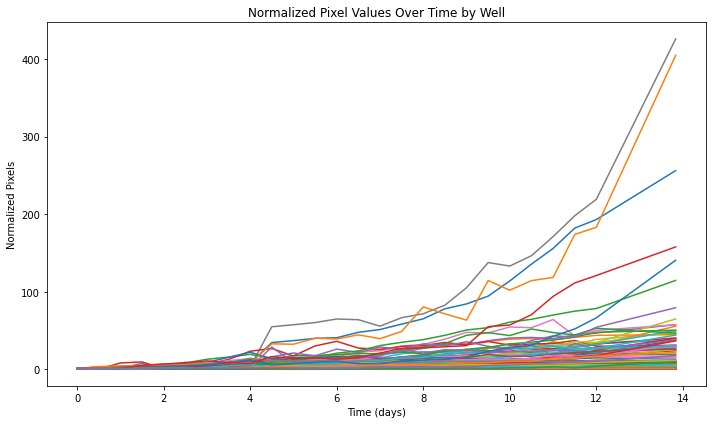

In [276]:
import re

# df = pd.DataFrame(data)


# L = ['C11_0','F9__2','F9__1','H8__1','H7__0']
# for l in L:
#     df = df[df['well_ID'] != l]

# Function to convert time string to total minutes
def convert_time_to_minutes(timestr):
    parts = re.match(r"(\d+)d(\d+)h(\d+)m", timestr)
    days, hours, minutes = map(int, parts.groups())
    return (days * 60*24 + hours * 60 + minutes)/1440 

# Convert 'Time' to total minutes
df['TimeMinutes'] = df['Time'].apply(convert_time_to_minutes)

df = df.sort_values(by=['Name', 'ColonyID', 'TimeMinutes'])

# Normalize Pixels to the first value for each Well
# df['NormalizedPixels'] = df.groupby('Well')['Pixels'].transform(lambda x: x / x.iloc[0])

# Normalize the pixel values to the first timepoint for each 'Name'/'ColonyID'
df['NormalizedPixels'] = df.groupby('well_ID')['Pixels'].transform(lambda x: x / x.iloc[0] if x.iloc[0] != 0 else 0)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size as desired

# Group by 'Well' and plot
for label, group in df.groupby('well_ID'):
    
    plt.plot(group['TimeMinutes'], group['NormalizedPixels'], label=label)

plt.xlabel('Time (days)')
plt.ylabel('Normalized Pixels')
plt.title('Normalized Pixel Values Over Time by Well')
# plt.legend()
plt.tight_layout()
# Save the figure as a PDF file
plt.savefig('brightfield_96well.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [213]:
df[df['NormalizedPixels']== np.max(df['NormalizedPixels']) ]

,Pixels,Name,Well,Time,ColonyID,well_ID,TimeMinutes,NormalizedPixels
2132,47703,VID778_C11_1_13d19h58m,C11,13d19h58m,0,C11_0,13.831944,425.919643


In [275]:
# Group by 'well_ID', then take the last entry for each group
df_final_timepoint = df.groupby('well_ID').apply(lambda x: x.iloc[-1])

# Sort the well_IDs by the 'Pixels' column in descending order
top_wells = df_final_timepoint.sort_values('NormalizedPixels', ascending=False).head(5)

# Display the top 5 well_IDs with the largest 'Pixels' values at the final timepoint
print("Top 5 well_IDs with the most pixels at the final time point:")
print(top_wells[['NormalizedPixels']])

Top 5 well_IDs with the most pixels at the final time point:
         NormalizedPixels
well_ID                  
C11_0          425.919643
F9__2          404.735294
F9__1          256.148148
H8__1          157.748201
H7__0          140.568720


In [223]:
top_wells['well_ID']

well_ID
C11_0    C11_0
F9__2    F9__2
F9__1    F9__1
H8__1    H8__1
H7__0    H7__0
Name: well_ID, dtype: object

In [227]:
import numpy as np
from PIL import Image
from matplotlib.path import Path
import matplotlib.pyplot as plt
import time
import os
import glob
import pandas as pd



# Start timing the process
start_time = time.time()

og_path = '/Volumes/RARH_incu/241023_96well/plate2'

# Get all Laso for each wells
paths_ = glob.glob(og_path +'_final/Laso/*.pkl')
paths_.sort(key=os.path.getmtime, reverse=False)

names_ = [os.path.basename(x)[4:-4]+'.tif' for x in paths_]

#List
name_keep = []
pixel_keep = []
colonyID_keep = []

# Load the polygon vertices and create a Path object
# paths_ = paths_[0:2]
for l,pL in enumerate(paths_):
    print(pL)
        
    os.makedirs(og_path+ '_final/final_data/'+pL.split('_')[-3])
    # Use pickle to load
    with open(pL, 'rb') as f:
        loaded_larrays = pickle.load(f)
        
    for j in range(0,len(loaded_larrays)):

    
        polygon_vertices = loaded_larrays[j]
        polygon_path = Path(polygon_vertices)

        paths_mask = sorted(glob.glob(og_path +'/mask/' + names_[l][:-14] + '*.tif' ),reverse = True)

        for i,pm in enumerate(paths_mask):
#             print(pm)
            # Open the mask image using memory mapping to avoid reading the entire file into memory
            mask = Image.open(pm)

            #Allign images and mask
            mask = mask.transpose(Image.TRANSPOSE)

            # Convert the image to grayscale
            gray_img = mask.convert('L')

            # Convert the image to a numpy array
            np_img = np.array(gray_img)

            # Assume that the mask is represented by non-zero pixels
            binary_mask = (np_img > 0).astype(np.uint8)

            # Generate a boolean mask of points inside the polygon
            # This approach uses broadcasting and is much faster
            x, y = np.meshgrid(np.arange(binary_mask.shape[1]), np.arange(binary_mask.shape[0]))
            points = np.vstack((x.ravel(), y.ravel())).T
            inside_polygon = polygon_path.contains_points(points)

            # Reshape the boolean array and use it to index the binary mask
            mask_inside_polygon = binary_mask & inside_polygon.reshape(binary_mask.shape)
            
            #store values
            pixel_keep.append(sum(sum(mask_inside_polygon)))
            name_keep.append(pm.split('/')[-1][:-4])
            colonyID_keep.append(j)
            
            

            # Visualize the result
            plt.imshow(binary_mask, cmap='gray')
            plt.imshow(mask_inside_polygon, cmap='jet', alpha=0.5)
            # Save the figure
            plt.savefig(og_path+ '_final/final_data/'+pL.split('_')[-3]+'/'+ pm.split('/')[-1][:-4]+str(j)+'.png', bbox_inches='tight')
            
            # If you no longer need the plot in memory, you can close it with plt.close()
            plt.close()

            # End timing the process
#             end_time = time.time()
#             print(f"Process took {end_time - start_time} seconds.")

well_ID = []
for i,n in enumerate(name_keep):
    well_ID.append(n[7:10]+'_'+str(colonyID_keep[i]))
    
# Combine these lists into a dictionary
data = {
    'Pixels': pixel_keep,
    'Name': name_keep,
    'Well': [n[7:10] for n in name_keep],
    'Time': [n[-9:] for n in name_keep],
    'ColonyID': colonyID_keep,
    'well_ID':well_ID
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv(og_path+ '_final/final_data/'+pL.split('/')[-1][4:-20]+'.csv', index=False)  # Set index=False if you don't want to save the index


/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H9_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H8_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H5_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H4_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H2_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_H11_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G8_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G7_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G6_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G5_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G3_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_96well/plate2_final/Laso/LasoVID779_G1_1_13d20h07m.pkl
/Volumes/RARH_incu/241023_9

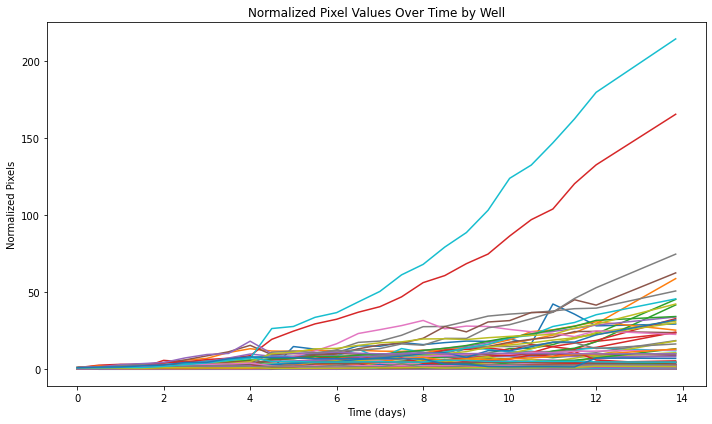

In [263]:
import re

df = pd.DataFrame(data)


L = ['E7__0','C6__0','G1__1','G6__1']#'D3__0',
for l in L:
    df = df[df['well_ID'] != l]

# Function to convert time string to total minutes
def convert_time_to_minutes(timestr):
    parts = re.match(r"(\d+)d(\d+)h(\d+)m", timestr)
    days, hours, minutes = map(int, parts.groups())
    return (days * 60*24 + hours * 60 + minutes)/1440 

# Convert 'Time' to total minutes
df['TimeMinutes'] = df['Time'].apply(convert_time_to_minutes)

df = df.sort_values(by=['Name', 'ColonyID', 'TimeMinutes'])

# Normalize Pixels to the first value for each Well
# df['NormalizedPixels'] = df.groupby('Well')['Pixels'].transform(lambda x: x / x.iloc[0])

# Normalize the pixel values to the first timepoint for each 'Name'/'ColonyID'
df['NormalizedPixels'] = df.groupby('well_ID')['Pixels'].transform(lambda x: x / x.iloc[0] if x.iloc[0] != 0 else 0)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size as desired

# Group by 'Well' and plot
for label, group in df.groupby('well_ID'):
    
    plt.plot(group['TimeMinutes'], group['NormalizedPixels'], label=label)

plt.xlabel('Time (days)')
plt.ylabel('Normalized Pixels')
plt.title('Normalized Pixel Values Over Time by Well')

# plt.legend()
plt.tight_layout()
plt.show()

In [256]:
# Group by 'well_ID', then take the last entry for each group
df_final_timepoint = df.groupby('well_ID').apply(lambda x: x.iloc[-1])

# Sort the well_IDs by the 'Pixels' column in descending order
top_wells = df_final_timepoint.sort_values('NormalizedPixels', ascending=False).head(5)

# Display the top 5 well_IDs with the largest 'Pixels' values at the final timepoint
print("Top 5 well_IDs with the most pixels at the final time point:")
print(top_wells[['NormalizedPixels']])

Top 5 well_IDs with the most pixels at the final time point:
         NormalizedPixels
well_ID                  
F9__1          214.352713
D3__0          165.468610
G6__0           74.706690
F8__0           62.535028
A6__0           58.826715


In [259]:
df

,Pixels,Name,Well,Time,ColonyID,well_ID,TimeMinutes,NormalizedPixels
1949,17,VID779_A11_1_00d00h00m,A11,00d00h00m,0,A11_0,0.000000,1.000000
1948,0,VID779_A11_1_00d12h00m,A11,00d12h00m,0,A11_0,0.500000,0.000000
1947,0,VID779_A11_1_01d00h00m,A11,01d00h00m,0,A11_0,1.000000,0.000000
1946,0,VID779_A11_1_01d12h00m,A11,01d12h00m,0,A11_0,1.500000,0.000000
1945,0,VID779_A11_1_02d00h00m,A11,02d00h00m,0,A11_0,2.000000,0.000000
...,...,...,...,...,...,...,...,...
27,1931,VID779_H9_1_12d00h00m,H9_,12d00h00m,1,H9__1,12.000000,4.779703
53,1514,VID779_H9_1_12d00h00m,H9_,12d00h00m,2,H9__2,12.000000,7.314010
0,62878,VID779_H9_1_13d20h07m,H9_,13d20h07m,0,H9__0,13.838194,1.722402
26,1879,VID779_H9_1_13d20h07m,H9_,13d20h07m,1,H9__1,13.838194,4.650990
